In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
(X_train, y_train), (X_test,y_test) = cifar10.load_data()
print(f"X_train shape : {X_train.shape}")
print(f"y_train shape : {y_train.shape}")
print(f"X_test shape : {X_test.shape}")
print(f"y_test shape : {y_test.shape}")

170498071/170498071 [==============================] - 5s 0us/step
X_train shape : (50000, 32, 32, 3)
y_train shape : (50000, 1)
X_test shape : (10000, 32, 32, 3)
y_test shape : (10000, 1)


<ipython-input-4-e50ca03d8cf0>:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label_index = int(y_train[index])


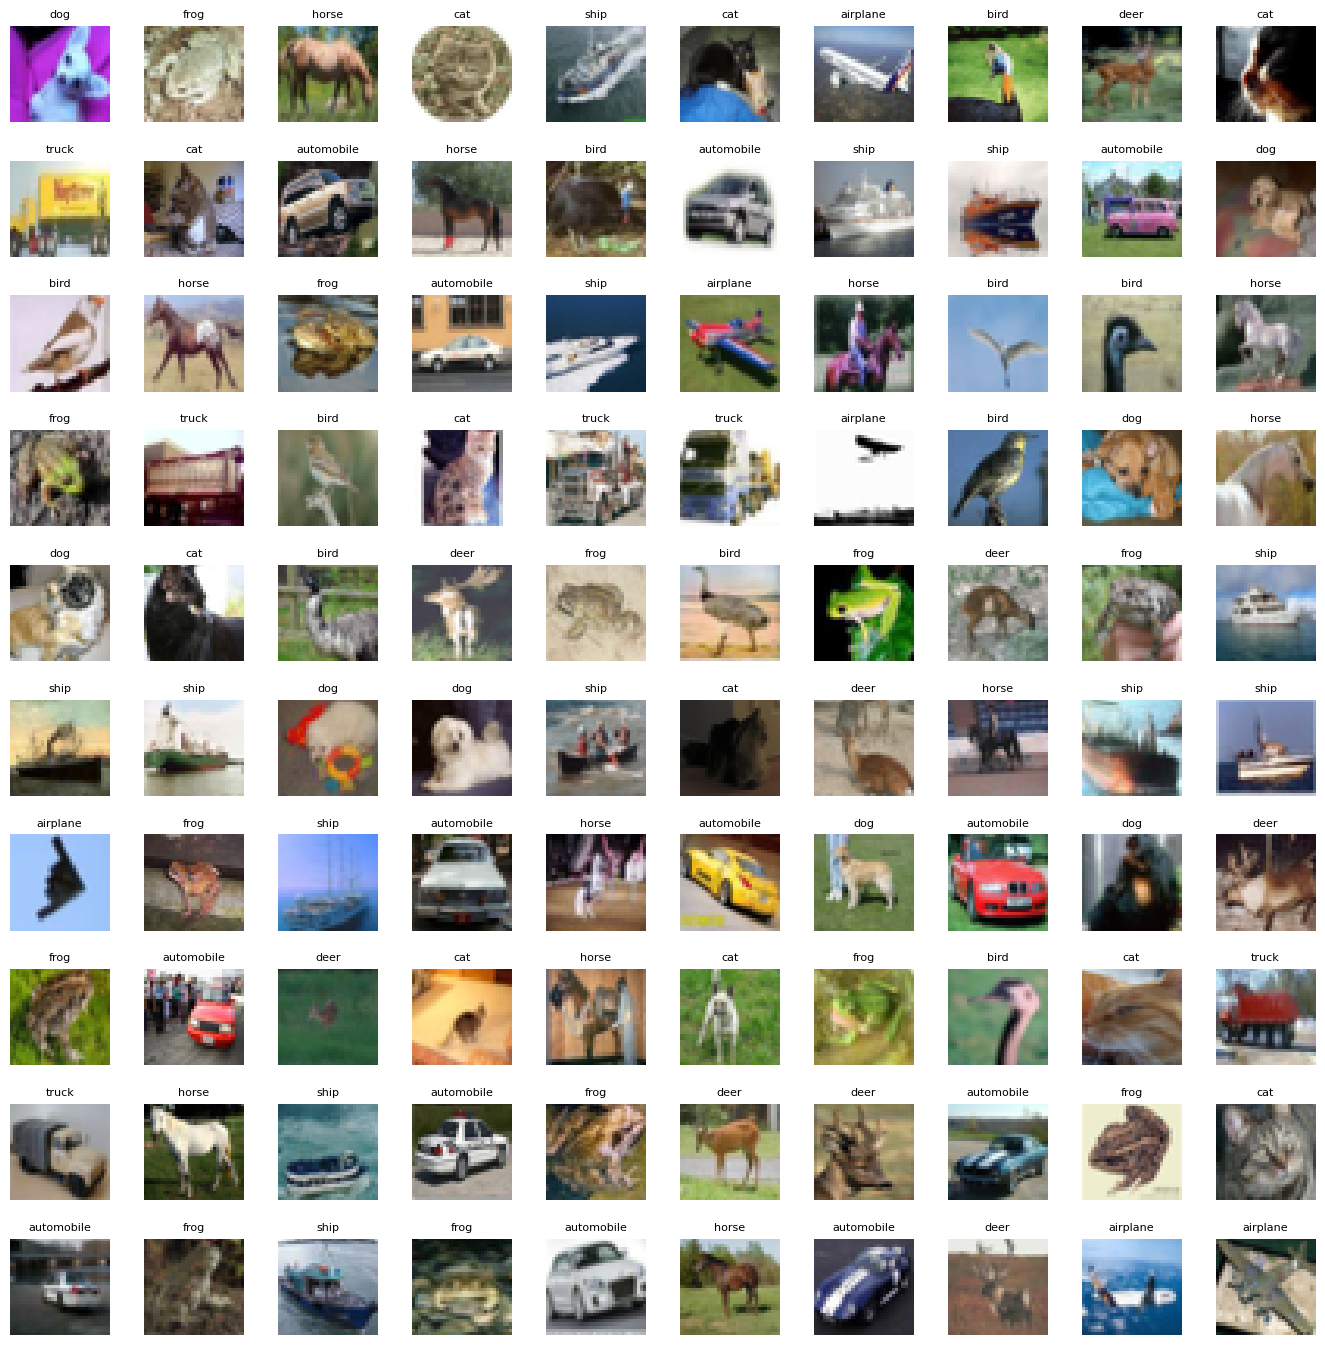

In [4]:
labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
w_grid = 10
L_grid = 10

fig, axes = plt.subplots(L_grid, w_grid, figsize = (17,17))
axes = axes.ravel()
n_train = len(X_train)
for i in np.arange(0,w_grid * L_grid):
  index = np.random.randint(0, n_train)
  axes[i].imshow(X_train[index,1:])
  label_index = int(y_train[index])
  axes[i].set_title(labels[label_index],fontsize = 8)
  axes[i].axis('off')

plt.subplots_adjust(hspace = 0.4)

Text(0.5, 1.0, 'Class distribution in training set')

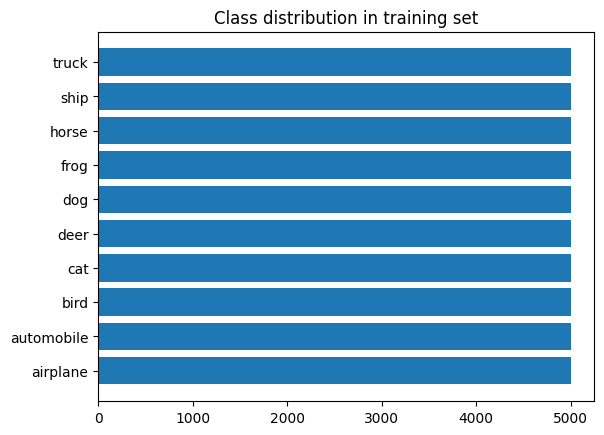

In [5]:
classes_name = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
classes, counts = np.unique(y_train, return_counts = True)
plt.barh(classes_name, counts)
plt.title("Class distribution in training set")

Text(0.5, 1.0, 'Class distribution in testing set')

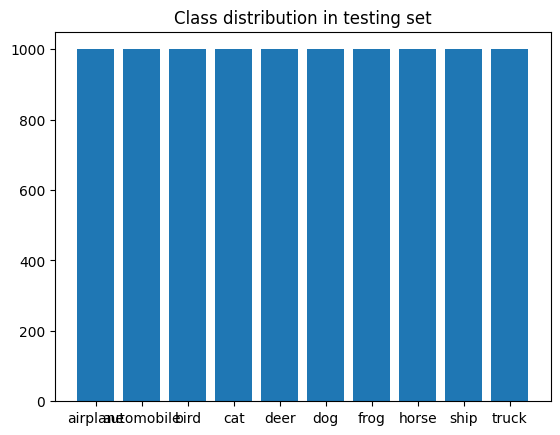

In [6]:

classes, counts = np.unique(y_test, return_counts = True)
plt.bar(classes_name, counts)
plt.title("Class distribution in testing set")

In [7]:
x_train = X_train/225.0
X_test = X_test/225.0

y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)

In [8]:
y_cat_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [9]:
INPUT_SHAPE = (32,32,3)
KERNEL_SIZE = (3,3)
model = Sequential()

model.add(Conv2D(filters =32, kernel_size = KERNEL_SIZE, input_shape = INPUT_SHAPE,activation = "relu", padding = "same"))
model.add(BatchNormalization())
model.add(Conv2D(filters =32, kernel_size = KERNEL_SIZE, input_shape = INPUT_SHAPE,activation = "relu", padding = "same"))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size = (2,2)))

model.add(Dropout(0.25))

model.add(Conv2D(filters =64, kernel_size = KERNEL_SIZE, input_shape = INPUT_SHAPE,activation = "relu", padding = "same"))
model.add(BatchNormalization())
model.add(Conv2D(filters =64, kernel_size = KERNEL_SIZE, input_shape = INPUT_SHAPE,activation = "relu", padding = "same"))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size = (2,2)))

model.add(Dropout(0.25))

model.add(Conv2D(filters =128, kernel_size = KERNEL_SIZE, input_shape = INPUT_SHAPE,activation = "relu", padding = "same"))
model.add(BatchNormalization())
model.add(Conv2D(filters =128, kernel_size = KERNEL_SIZE, input_shape = INPUT_SHAPE,activation = "relu", padding = "same"))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size = (2,2)))

model.add(Dropout(0.25))


model.add(Flatten())

model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.25))
model.add(Dense(10, activation = "softmax"))

METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name = 'recall')
]
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = METRICS)


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                        

In [11]:
early_stop = EarlyStopping(monitor = 'val_loss', patience=2)

In [12]:
batch_size = 32

data_generator = ImageDataGenerator(width_shift_range = 0.1, height_shift_range= 0.1, horizontal_flip = True)
train_generator = data_generator.flow(X_train, y_cat_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size

r = model.fit(train_generator,epochs = 2,steps_per_epoch = steps_per_epoch,validation_data = (X_test,y_cat_test))
# callbacks = [early_stop],batch_size=batch_size


Epoch 1/2
1562/1562 [==============================] - 493s 313ms/step - loss: 1.6434 - accuracy: 0.4099 - precision: 0.6214 - recall: 0.1965 - val_loss: 3.5337 - val_accuracy: 0.1000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/2
1562/1562 [==============================] - 483s 309ms/step - loss: 1.2364 - accuracy: 0.5604 - precision: 0.7315 - recall: 0.3959 - val_loss: 6.5781 - val_accuracy: 0.1000 - val_precision: 0.8333 - val_recall: 5.0000e-04


Image 10 is [0]
1/1 [==============================] - 0s 398ms/step
The model predict that image 10 is 6


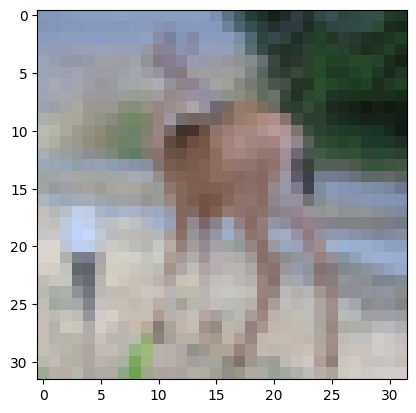

In [13]:
my_image = X_test[100]
plt.imshow(my_image)
print(f"Image 10 is {y_test[10]}")
pred_100 = np.argmax(model.predict(my_image.reshape(1,32,32,3)))
print(f"The model predict that image 10 is {pred_100}")